<a href="https://www.kaggle.com/code/youssefelzahar/inferential-statistics?scriptVersionId=162499621" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp


In [2]:
d1=pd.read_csv("/kaggle/input/us-airlline/air.csv")
d1

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,43032450.0,4905830.0,47938280.0,785160.0,57667.0,842827.0,36211422.0,12885980.0,49097402.0,56191300.0,17968572.0,74159872.0,64.44,71.71,66.20
1,2003,2,41166780.0,4245366.0,45412146.0,690351.0,51259.0,741610.0,34148439.0,10715468.0,44863907.0,50088434.0,15587880.0,65676314.0,68.18,68.74,68.31
2,2003,3,49992700.0,5008613.0,55001313.0,797194.0,58926.0,856120.0,41774564.0,12567068.0,54341633.0,57592901.0,17753174.0,75346075.0,72.53,70.79,72.12
3,2003,4,47033260.0,4345444.0,51378704.0,766260.0,55005.0,821265.0,39465980.0,10370592.0,49836572.0,54639679.0,15528761.0,70168440.0,72.23,66.78,71.02
4,2003,5,49152352.0,4610834.0,53763186.0,789397.0,55265.0,844662.0,41001934.0,11575026.0,52576960.0,55349897.0,15629821.0,70979718.0,74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,71423653.0,10358666.0,81782319.0,667331.0,71924.0,739255.0,66743565.0,26805432.0,93548998.0,77821407.0,31950687.0,109772094.0,85.77,83.90,85.22
245,2023,6,72482621.0,11544505.0,84027126.0,661293.0,75279.0,736572.0,68789127.0,29883465.0,98672591.0,78058358.0,33410671.0,111469028.0,88.13,89.44,88.52
246,2023,7,75378157.0,12432615.0,87810772.0,684939.0,79738.0,764677.0,72267904.0,31376000.0,103643904.0,81986010.0,35326191.0,117312202.0,88.15,88.82,88.35
247,2023,8,71477988.0,11572149.0,83050137.0,691482.0,77137.0,768619.0,67933484.0,29938507.0,97871992.0,81997399.0,34908793.0,116906192.0,82.85,85.76,83.72


# explain of columns 

Dom_Pax

Domestic Air Travel Passengers

Int_Pax

International Air Travel Passengers

Pax

Total Air Travel Passengers

Dom_Flt

Number of Flights (Domestic)

Int_Flt

Number of Flights (International)

Flt

Number of Flights (Total)

Dom_RPM

Revenue Passenger-miles (Domestic)


Int_RPM

Revenue Passenger-miles (International)





In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    float64
 3   Int_Pax  249 non-null    float64
 4   Pax      249 non-null    float64
 5   Dom_Flt  249 non-null    float64
 6   Int_Flt  249 non-null    float64
 7   Flt      249 non-null    float64
 8   Dom_RPM  249 non-null    float64
 9   Int_RPM  249 non-null    float64
 10  RPM      249 non-null    float64
 11  Dom_ASM  249 non-null    float64
 12  Int_ASM  249 non-null    float64
 13  ASM      249 non-null    float64
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(15), int64(2)
memory usage: 33.2 KB


# Inferential statistics 

**we use sample to get population**

1. hypotheis testing

2. regression(linear,multiple)

3. Anova



# Regression

The best linear line describe the corrolation between two variables 
We have two types

1. linear regression

2. multiple regression but its an inferential statistics

The equation of regression

**yhat=a+(b*x)**

**yhat=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

# Linear Regression

In [4]:
x=d1["Dom_Pax"]
y=d1["Dom_Flt"]


In [5]:
slope,intercept,r,p,std_err=stats.linregress(x,y)
def myfun(i):
    return intercept+(slope*i)
mymodel = list(map(myfun,x))


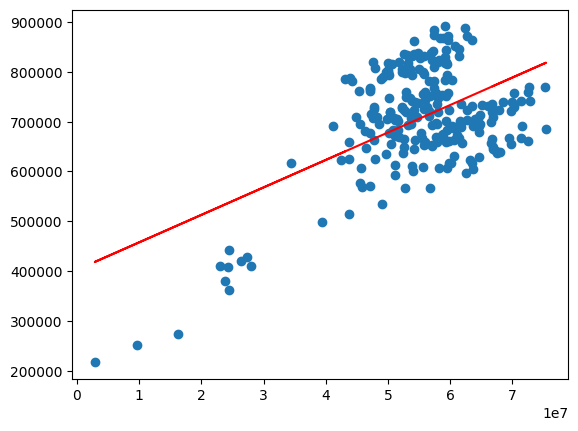

In [6]:
plt.scatter(x,y)
plt.plot(x,mymodel,color='red')
plt.show()

In [7]:
print("b",slope)
print("a",intercept)
print("p",p)
print("std_err",std_err)

s=myfun(100)
print(s)

b 0.005506132716515946
a 402758.72082950146
p 5.3156895585332156e-20
std_err 0.000550385239973366
402759.2714427731


# The coefficient of correlation 
how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

**The r value ranges from -1 to 1, where 0 means no relationship, and (1,-1) means 100% related.**

In [8]:
print("r =",r)


r = 0.5369864170525395


# Bad regression 
**because it's equal 0**

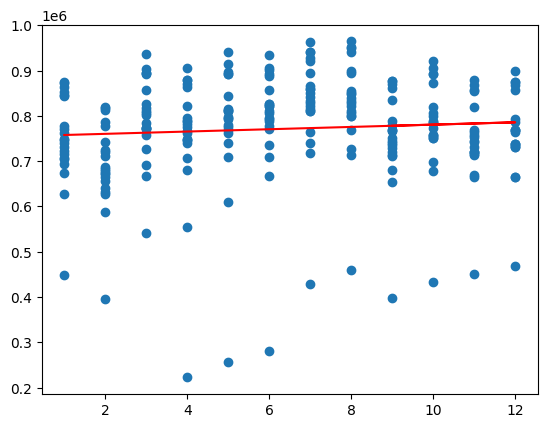

In [9]:
m=d1["Month"]
n=d1["Flt"]
slope, intercept, r2, p, std_err = stats.linregress(m, n)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, m))

plt.scatter(m, n)
plt.plot(m, mymodel,color='red')
plt.show()

In [10]:
r2

0.07569664261539753

**Using sikitlearn (Linear regression) to predict the value of y by using valuse of x**


In [11]:
x=d1["Dom_Pax"]
y=d1["Dom_Flt"]

x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.40, random_state = 50,shuffle=True)

In [13]:
regr = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
regr.fit(x_train, y_train)

predict=regr.predict([[41166780.0]])


regr.score(x_train, y_train)

0.3269505538778198

In [14]:
print(predict)

[[622228.40915886]]


**The Mean Squared Error measures how close a regression line is to a set of data points**

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

In [15]:
mse=mean_squared_error(x_train, y_train)
mse

3041377358317256.0

# Multiple Regression

use more than one dependent variables to predict one independent variable

In [16]:
mx=d1[["Dom_Pax","Flt"]]
my=d1["Month"]

my=np.array(my).reshape(-1,1)

In [17]:
xm_train, xm_val, ym_train, ym_val = train_test_split(mx, my, test_size=0.50, random_state = 100,shuffle=True)

In [18]:
multireg = LinearRegression()
multireg.fit(xm_train, ym_train)
multireg.score(xm_train, ym_train)

0.026477163323733066

In [19]:
xm_val

,Dom_Pax,Flt
65,59559171.0,888697.0
59,53288538.0,874306.0
194,70233456.0,806233.0
112,55749349.0,795525.0
192,58033637.0,739803.0
...,...,...
221,60109293.0,666566.0
92,50304708.0,779011.0
210,22921780.0,427918.0
220,52751776.0,610401.0


In [20]:
predictmulti=multireg.predict([[69432042.0,739118.0]])
predictmulti

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.58891065]])

# Hypothesis testing 

is a systematic procedure for deciding whether the results of a research study support a particular theory which applies to a population

**we have two types**

1. null hypothesis  H0
 
2. alternative hypothesis Ha



# null hypothesis

it is a statement that there is no significant difference or effect

if p<=0.05 

we rejected null hypothesis

# alternative hypothesis

is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0)

# P-value or probability value

is a measure used in statistical hypothesis testing to determine the strength of evidence against the null hypothesis

if p<= 0.05

**we rejected null hypothesis**

# one sample test

is used to compare the diffrence between sample and population mean 

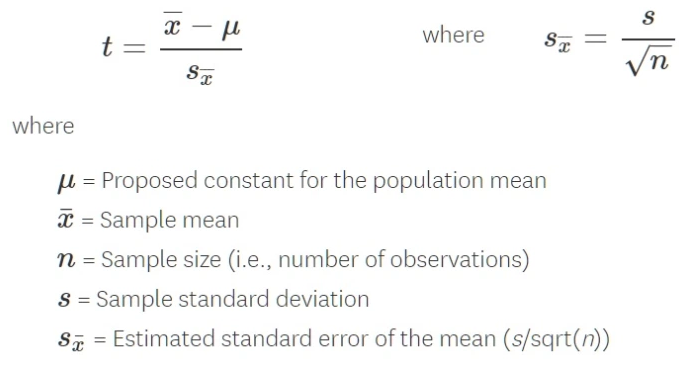

In [21]:
popmean=d1["Year"].mean()
popmean

2012.879518072289

In [22]:
# let's take sample from data

sample=np.random.choice(d1["Year"],50)

In [23]:
sample

array([2011, 2009, 2018, 2018, 2007, 2016, 2009, 2003, 2014, 2014, 2009,
       2014, 2023, 2021, 2003, 2007, 2010, 2011, 2010, 2018, 2017, 2008,
       2018, 2020, 2018, 2011, 2008, 2012, 2023, 2007, 2018, 2013, 2017,
       2003, 2009, 2005, 2009, 2004, 2014, 2023, 2006, 2019, 2021, 2019,
       2018, 2018, 2012, 2008, 2017, 2018])

In [24]:
#30=popmean (population mean)
ttest,p_value=ttest_1samp(sample,popmean)


In [25]:
ttest

0.34464035689120587

In [26]:
sample.mean()

2013.16

In [27]:
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

accepted null hypothesis 0.7318396431423847


# Two sample test 

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

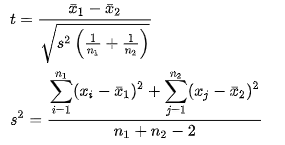

In [28]:
sample_a=np.random.choice(d1["Flt"],50)

In [29]:
sample_b=np.random.choice(d1["Dom_Pax"],50)

In [30]:
_,p_value=stats.ttest_ind(a=sample_a,b=sample_b,equal_var=False)


In [31]:
_

-33.69999433622881

In [32]:
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

rejected null hypothesis 1.4703228563447087e-35


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)

# Anova Test(F-Test)

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.



# One Way F-test(Anova) 

It tell whether two or more groups are similar or not based on their mean similarity and f-score.


Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not



In [33]:
import seaborn as sns 
df1=sns.load_dataset('iris')
df1.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
df_anova = df1[['petal_width','species']]


In [35]:
grps = pd.unique(df_anova.species.values)
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [37]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])


In [38]:
if p <=0.05:
    print("rejected null hypothesis",p)
else:
    print("accepted null hypothesis",p)

rejected null hypothesis 4.169445839443116e-85
